C:\Users\Sai kiran\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


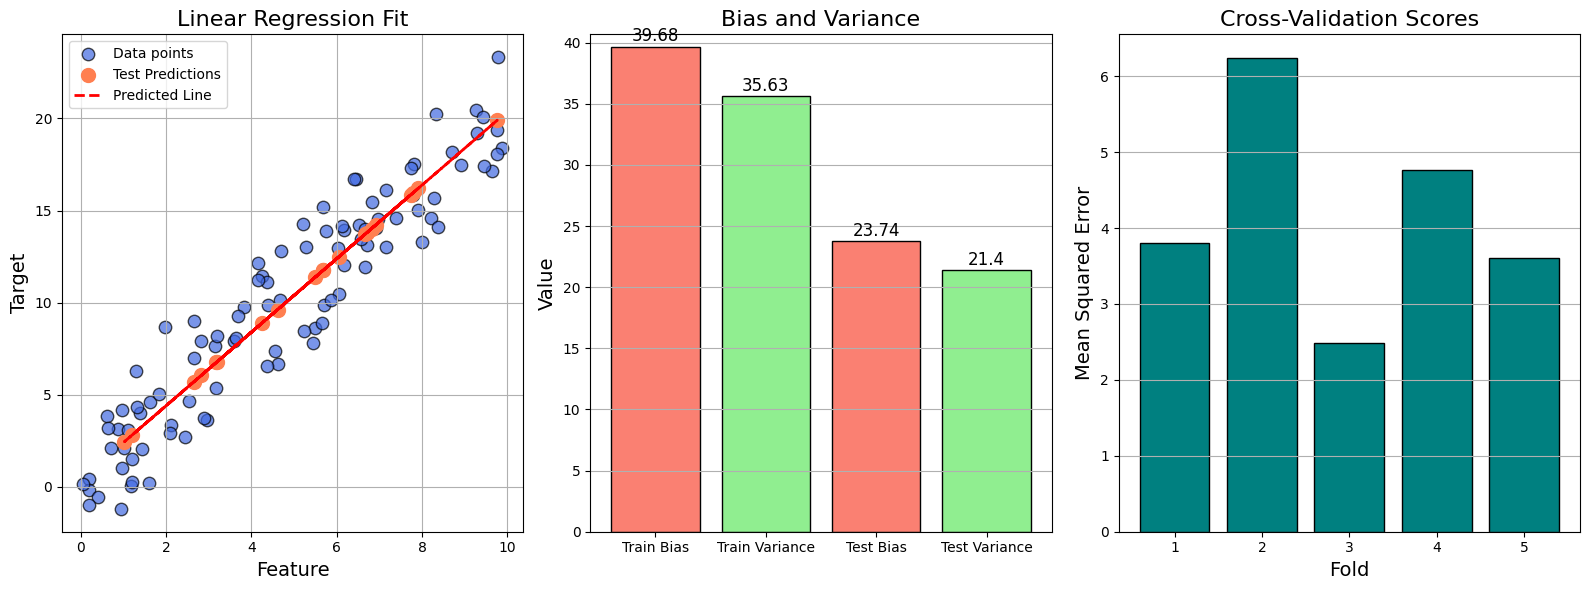

Train Bias: 39.675, Train Variance: 35.630
Test Bias: 23.735, Test Variance: 21.400
Mean Cross-Validation MSE: 4.179


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(0) 
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100) * 2 

data = pd.DataFrame(np.column_stack((X, y)), columns=['Feature', 'Target'])

data = data.drop_duplicates()

X_train, X_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def calculate_bias_variance(y_true, y_pred):
    bias = np.mean((y_true - np.mean(y_pred)) ** 2)
    variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
    return bias, variance

bias_train, variance_train = calculate_bias_variance(y_train, y_train_pred)
bias_test, variance_test = calculate_bias_variance(y_test, y_test_pred)

cross_val_scores = cross_val_score(model, data[['Feature']], data['Target'], cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cross_val_scores)

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(data['Feature'], data['Target'], color='royalblue', alpha=0.7, edgecolor='k', s=80, label='Data points')
plt.scatter(X_test, y_test_pred, color='coral', marker='o', s=100, label='Test Predictions')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, linestyle='--', label='Predicted Line')
plt.title('Linear Regression Fit', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
labels = ['Train Bias', 'Train Variance', 'Test Bias', 'Test Variance']
values = [bias_train, variance_train, bias_test, variance_test]
colors = ['salmon', 'lightgreen', 'salmon', 'lightgreen']

bars = plt.bar(labels, values, color=colors, edgecolor='black')
plt.title('Bias and Variance', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.ylim(0, max(values) + 1) 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.grid(axis='y')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(cross_val_scores) + 1), -cross_val_scores, color='teal', edgecolor='black')
plt.title('Cross-Validation Scores', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(range(1, len(cross_val_scores) + 1)) 
plt.grid(axis='y')

plt.tight_layout()
plt.show()

print(f'Train Bias: {bias_train:.3f}, Train Variance: {variance_train:.3f}')
print(f'Test Bias: {bias_test:.3f}, Test Variance: {variance_test:.3f}')
print(f'Mean Cross-Validation MSE: {mean_cv_score:.3f}')
